In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [85]:
baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")
del baseDeDonnees["sunset_hhmm"]
del baseDeDonnees["sunrise_hhmm"]
baseDeDonnees


C:\Users\test8\AppData\Local\Temp\ipykernel_9304\2278083711.py:1: DtypeWarning: Columns (46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  baseDeDonnees =  pd.read_csv("Donnés\BaseDeDonneesPlusComplete1970-2025.csv", index_col = "date")


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2025-03-03,-5.0,-11.50,-13.50,-22.0,NaN,-25.0,83,64.6,62.5,42,...,NaN,NaN,8.0,4.5,4.0,0.0,NaN,NaN,NaN,NaN
2025-03-02,-12.9,-16.34,-16.89,-20.9,NaN,-31.0,70,64.0,63.0,56,...,NaN,NaN,5.0,1.6,2.5,0.0,NaN,NaN,NaN,NaN
2025-03-01,0.0,-7.04,-6.90,-13.8,NaN,-23.0,89,80.9,79.5,70,...,NaN,NaN,8.0,7.2,6.0,4.0,NaN,NaN,NaN,NaN
2025-02-28,1.5,-6.61,-4.15,-9.8,NaN,-18.0,92,64.2,67.5,43,...,NaN,NaN,8.0,6.1,5.0,2.0,NaN,NaN,NaN,NaN
2025-02-27,1.4,-1.72,-1.70,-4.8,NaN,-8.0,95,86.9,84.0,73,...,NaN,NaN,8.0,6.7,4.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-03,-10.0,-18.01,-16.95,-23.9,NaN,-28.0,76,61.0,59.5,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,-11.7,-14.84,-14.75,-17.8,NaN,-28.0,59,55.4,54.5,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01,-13.9,-17.65,-18.35,-22.8,NaN,-29.0,59,52.2,53.0,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#Verifier quel donné sont trop peu.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc


max_temperature              0.000000
avg_hourly_temperature       0.000000
avg_temperature              0.000000
min_temperature              0.000000
max_humidex                  0.747383
                               ...   
min_cloud_cover_8            0.793381
max_cloud_cover_10           0.994145
avg_hourly_cloud_cover_10    0.994145
avg_cloud_cover_10           0.994145
min_cloud_cover_10           0.994145
Length: 69, dtype: float64

In [87]:
colonne_valide = baseDeDonnees.columns[null_prc < 0.05]
colonne_valide.shape[0]

36

In [88]:
baseDeDonnees = baseDeDonnees[colonne_valide].copy()
baseDeDonnees.dtypes

max_temperature                 float64
avg_hourly_temperature          float64
avg_temperature                 float64
min_temperature                 float64
max_relative_humidity             int64
avg_hourly_relative_humidity    float64
avg_relative_humidity           float64
min_relative_humidity             int64
max_dew_point                   float64
avg_hourly_dew_point            float64
avg_dew_point                   float64
min_dew_point                   float64
max_wind_speed                    int64
avg_hourly_wind_speed           float64
avg_wind_speed                  float64
min_wind_speed                    int64
max_pressure_sea                float64
avg_hourly_pressure_sea         float64
avg_pressure_sea                float64
min_pressure_sea                float64
max_pressure_station            float64
avg_hourly_pressure_station     float64
avg_pressure_station            float64
min_pressure_station            float64
max_visibility                    int64


In [89]:
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()
#Remplir les trous dans la base de donné par avec la valeurs avant.
baseDeDonnees = baseDeDonnees.ffill()
#Verification qu'il ne manque plus de manque de donnés.
null_prc = baseDeDonnees.apply(pd.isnull).sum()/baseDeDonnees.shape[0]
null_prc



max_temperature                 0.00000
avg_hourly_temperature          0.00000
avg_temperature                 0.00000
min_temperature                 0.00000
max_relative_humidity           0.00000
avg_hourly_relative_humidity    0.00000
avg_relative_humidity           0.00000
min_relative_humidity           0.00000
max_dew_point                   0.00000
avg_hourly_dew_point            0.00000
avg_dew_point                   0.00000
min_dew_point                   0.00000
max_wind_speed                  0.00000
avg_hourly_wind_speed           0.00000
avg_wind_speed                  0.00000
min_wind_speed                  0.00000
max_pressure_sea                0.00000
avg_hourly_pressure_sea         0.00000
avg_pressure_sea                0.00000
min_pressure_sea                0.00000
max_pressure_station            0.00000
avg_hourly_pressure_station     0.00000
avg_pressure_station            0.00000
min_pressure_station            0.00000
max_visibility                  0.00000


In [90]:
#Rendre en minuscule les titres
baseDeDonnees.columns = baseDeDonnees.columns.str.lower()

<Axes: xlabel='date'>

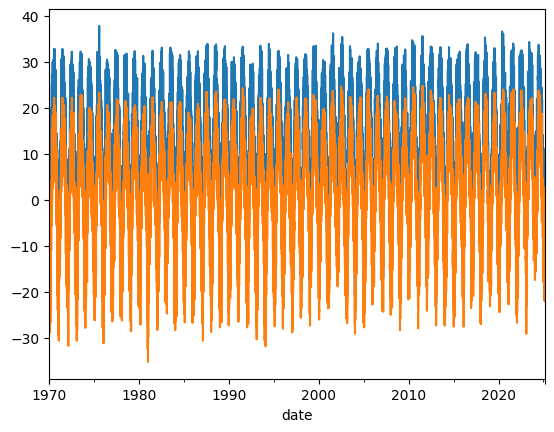

In [91]:
baseDeDonnees.index = pd.to_datetime(baseDeDonnees.index)
baseDeDonnees.index.year.value_counts().sort_index()
baseDeDonnees["max_temperature"].plot()
baseDeDonnees["min_temperature"].plot()


In [92]:
#Inverser les dates.
baseDeDonnees = baseDeDonnees.iloc[::-1]
#Choix de se qu'on veut produire.(Ici temperature maximum)
baseDeDonnees["target"] = baseDeDonnees.shift(-1)["max_temperature"]

baseDeDonnees = baseDeDonnees.ffill()


In [93]:
#Configuration du model
model_rr = Ridge(alpha=.1)
predicteur = baseDeDonnees.columns[~baseDeDonnees.columns.isin(["target","date"])]
predicteur


Index(['max_temperature', 'avg_hourly_temperature', 'avg_temperature',
       'min_temperature', 'max_relative_humidity',
       'avg_hourly_relative_humidity', 'avg_relative_humidity',
       'min_relative_humidity', 'max_dew_point', 'avg_hourly_dew_point',
       'avg_dew_point', 'min_dew_point', 'max_wind_speed',
       'avg_hourly_wind_speed', 'avg_wind_speed', 'min_wind_speed',
       'max_pressure_sea', 'avg_hourly_pressure_sea', 'avg_pressure_sea',
       'min_pressure_sea', 'max_pressure_station',
       'avg_hourly_pressure_station', 'avg_pressure_station',
       'min_pressure_station', 'max_visibility', 'avg_hourly_visibility',
       'avg_visibility', 'min_visibility', 'heatdegdays', 'cooldegdays',
       'growdegdays_5', 'growdegdays_7', 'growdegdays_10', 'precipitation',
       'rain', 'snow'],
      dtype='object')

In [94]:
def backtest(baseDeDonnees,model,predicteur,start =3650 ,step=90):
    all_predictions = []
    for i in range(start,baseDeDonnees.shape[0],step):
        train = baseDeDonnees.iloc[:i,:]
        test = baseDeDonnees.iloc[i:i+step,:]

        model.fit(train[predicteur],train["target"])
        preds = model.predict(test[predicteur])
        preds = pd.Series(preds,index =test.index)
        combined = pd.concat([test["target"],preds],axis=1)
        combined.columns = ["Vrais valeur","Valeur predite"]
        combined["difference"] = (combined["Valeur predite"] - combined["Vrais valeur"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [95]:
predictions = backtest(baseDeDonnees,model_rr,predicteur)
predictions

,Vrais valeur,Valeur predite,difference
date,,,
1979-12-28,2.0,0.536755,1.463245
1979-12-29,0.8,2.829606,2.029606
1979-12-30,-3.4,-1.102513,2.297487
1979-12-31,-2.3,-2.598143,0.298143
1980-01-01,-2.8,0.392651,3.192651
...,...,...,...
2025-02-27,1.5,-1.049586,2.549586
2025-02-28,0.0,-1.161622,1.161622
2025-03-01,-12.9,-7.387300,5.512700


In [96]:
#Creer la valeur d'erreur pour la voir diminuer.(En Gros en calcul la moyenne de la difference.
mean_absolute_error(predictions["Vrais valeur"],predictions["Valeur predite"])


2.866024561302061

In [97]:
def prc_diff(ancienne,nouvelle):
    return (nouvelle - ancienne) /ancienne
def computer_rolling(baseDeDonnees,horizon,col):
    label = f"rolling_{horizon}_{col}"

    baseDeDonnees[label] = baseDeDonnees[col].rolling(horizon).mean()
    baseDeDonnees[f"{label}_pct"] = prc_diff(baseDeDonnees[label],baseDeDonnees[col])
    return baseDeDonnees
rolling_horizon = [3, 14]

for horizon in  rolling_horizon:
    for col in ["max_temperature","min_temperature","precipitation","rain","snow"]:
        baseDeDonnees = computer_rolling(baseDeDonnees,horizon,col)

#Enlever les valeurs NaN generer parce que les il n'y as de donnes les 14 derniers jours.
baseDeDonnees = baseDeDonnees.iloc[14:,:]
baseDeDonnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,rolling_14_max_temperature,rolling_14_max_temperature_pct,rolling_14_min_temperature,rolling_14_min_temperature_pct,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snow,rolling_14_snow_pct
date,,,,,,,,,,,,,,,,,,,,,
1970-01-13,-12.8,-15.39,-16.10,-19.4,78,71.2,71.5,65,-16.1,-19.3,...,-11.957143,0.070490,-21.621429,-0.102742,0.442857,0.129032,0.000000,NaN,0.635714,0.573034
1970-01-14,-15.6,-18.98,-18.89,-22.2,69,58.4,61.0,53,-20.0,-25.1,...,-12.121429,0.286977,-21.735714,0.021360,0.442857,-1.000000,0.000000,NaN,0.635714,-1.000000
1970-01-15,-20.0,-22.09,-22.50,-25.0,58,51.9,53.0,48,-27.8,-29.3,...,-12.557143,0.592719,-21.892857,0.141925,0.442857,-1.000000,0.000000,NaN,0.635714,-1.000000
1970-01-16,-11.1,-16.38,-17.50,-23.9,79,63.3,65.5,52,-16.7,-21.8,...,-12.514286,-0.113014,-22.328571,0.070377,0.642857,3.355556,0.000000,NaN,0.892857,3.032000
1970-01-17,-4.4,-8.22,-8.85,-13.3,91,75.4,70.5,50,-8.9,-11.7,...,-12.114286,-0.636792,-21.571429,-0.383444,0.642857,-1.000000,0.000000,NaN,0.892857,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,1.4,-1.72,-1.70,-4.8,95,86.9,84.0,73,0.2,-3.7,...,-4.057143,-1.345070,-11.235714,-0.572791,3.671429,0.634241,0.228571,-1.0,3.414286,0.640167
2025-02-28,1.5,-6.61,-4.15,-9.8,92,64.2,67.5,43,0.0,-12.6,...,-3.457143,-1.433884,-10.821429,-0.094389,3.885714,-0.227941,0.228571,-1.0,3.628571,-0.173228
2025-03-01,0.0,-7.04,-6.90,-13.8,89,80.9,79.5,70,-4.5,-9.8,...,-2.878571,-1.000000,-10.757143,0.282869,3.885714,-0.588235,0.228571,-1.0,3.628571,-0.559055


In [98]:
baseDeDonnees = baseDeDonnees.fillna(0)
baseDeDonnees

,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_hourly_dew_point,...,rolling_14_max_temperature,rolling_14_max_temperature_pct,rolling_14_min_temperature,rolling_14_min_temperature_pct,rolling_14_precipitation,rolling_14_precipitation_pct,rolling_14_rain,rolling_14_rain_pct,rolling_14_snow,rolling_14_snow_pct
date,,,,,,,,,,,,,,,,,,,,,
1970-01-13,-12.8,-15.39,-16.10,-19.4,78,71.2,71.5,65,-16.1,-19.3,...,-11.957143,0.070490,-21.621429,-0.102742,0.442857,0.129032,0.000000,0.0,0.635714,0.573034
1970-01-14,-15.6,-18.98,-18.89,-22.2,69,58.4,61.0,53,-20.0,-25.1,...,-12.121429,0.286977,-21.735714,0.021360,0.442857,-1.000000,0.000000,0.0,0.635714,-1.000000
1970-01-15,-20.0,-22.09,-22.50,-25.0,58,51.9,53.0,48,-27.8,-29.3,...,-12.557143,0.592719,-21.892857,0.141925,0.442857,-1.000000,0.000000,0.0,0.635714,-1.000000
1970-01-16,-11.1,-16.38,-17.50,-23.9,79,63.3,65.5,52,-16.7,-21.8,...,-12.514286,-0.113014,-22.328571,0.070377,0.642857,3.355556,0.000000,0.0,0.892857,3.032000
1970-01-17,-4.4,-8.22,-8.85,-13.3,91,75.4,70.5,50,-8.9,-11.7,...,-12.114286,-0.636792,-21.571429,-0.383444,0.642857,-1.000000,0.000000,0.0,0.892857,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-27,1.4,-1.72,-1.70,-4.8,95,86.9,84.0,73,0.2,-3.7,...,-4.057143,-1.345070,-11.235714,-0.572791,3.671429,0.634241,0.228571,-1.0,3.414286,0.640167
2025-02-28,1.5,-6.61,-4.15,-9.8,92,64.2,67.5,43,0.0,-12.6,...,-3.457143,-1.433884,-10.821429,-0.094389,3.885714,-0.227941,0.228571,-1.0,3.628571,-0.173228
2025-03-01,0.0,-7.04,-6.90,-13.8,89,80.9,79.5,70,-4.5,-9.8,...,-2.878571,-1.000000,-10.757143,0.282869,3.885714,-0.588235,0.228571,-1.0,3.628571,-0.559055


In [ ]:
def expend_mean(baseDeDonnees):
    return baseDeDonnees.expending(1).mean()
for col in